# The Internet and Dating
In this project, I will investigate the influence of the Internet on how couples meet.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('how-couples-met.csv')
df #display dataframe

,decade,college,at work,through friends,through family,online,restaurant,neighbors
0,1960.0,12.2,18.2,45.9,30.4,0.0,21.5,11.6
1,1970.0,16.4,23.9,48.9,28.6,0.0,25.0,8.9
2,1980.0,10.2,32.4,36.6,20.2,0.3,28.3,8.0
3,1990.0,10.5,30.7,35.9,18.5,3.2,26.2,7.7
4,2000.0,10.6,20.3,38.1,15.2,22.6,18.5,8.8
5,2010.0,6.7,15.5,28.9,10.0,42.2,14.0,4.3


The data captures seven of the common ways couples met, including at college or work, through friends or family, online, at a restaurant, or as neighbors.

We see the percentage of couples who reported that they met by each method, for each decade. In the 1960s, most couples met through friends or family. By the 2010s, meeting through family had dropped to only 10% of couples.

### Visualizing time series

A time series is a sequence of data points ordered by time. A great way to visualize a time series is to use a line graph.

In [ ]:
df = df.set_index('decade')
df #display

,college,at work,through friends,through family,online,restaurant,neighbors
decade,,,,,,,
1960.0,12.2,18.2,45.9,30.4,0.0,21.5,11.6
1970.0,16.4,23.9,48.9,28.6,0.0,25.0,8.9
1980.0,10.2,32.4,36.6,20.2,0.3,28.3,8.0
1990.0,10.5,30.7,35.9,18.5,3.2,26.2,7.7
2000.0,10.6,20.3,38.1,15.2,22.6,18.5,8.8
2010.0,6.7,15.5,28.9,10.0,42.2,14.0,4.3


Now the index is the `decade` column.

<Axes: xlabel='decade'>

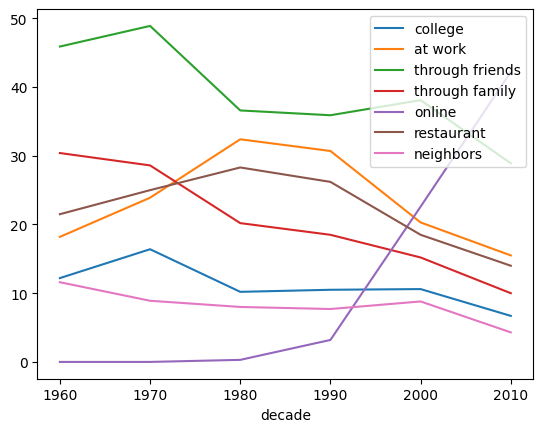

In [ ]:
df.plot()

The purple line, representing meeting online, shows a dramatic rise from 3% in the 1990s to 42% in the 2010s, becoming the dominant method that couples meet.

### Visual storytelling
A good visualization uses focus to help tell a story.

The big story in this graph is that meeting online has rapidly become the most popular way for couples to meet.

Let's create a new line graph, this time drawing attention to the line for meeting online. For colors I will use the the tab10 color palette supported by Matplotlib.

I will start by making the `online` line thicker and red (`C3`). I will also reduce the transparency of the other lines, making them dimmer.

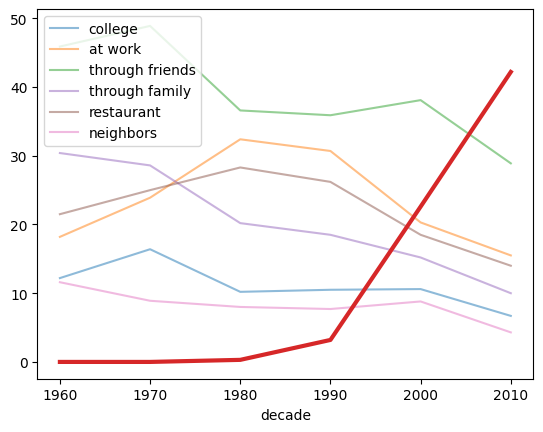

In [ ]:
focus_column = 'online'
focus_color = 'C3' #red
back_columns = [
    'college', 'at work', 'through friends',
    'through family', 'restaurant', 'neighbors'
]
back_colors = ['C0', 'C1', 'C2',  'C4', 'C5', 'C6']
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.show()

The graph now emphasizes that meeting online has become the most popular way for couples to meet. The story is more clear.

There are still improvements possible to the graph, though, to make it look more polished and professional.

In [ ]:
def add_end_labels(df, x, column_names, alpha):
    for column_name in column_names:
        y = df[column_name].iloc[-1]
        offset_spacing = "  "
        label = offset_spacing + column_name
        plt.text(x, y, label, va="center", alpha=alpha)

I am using `plt.text( )` to add at the end of each line with an offset spacing. 

Let's label the lines with our helper function! Remember that the storytelling goal here is for the graph to emphasize that meeting online has become the most common way for couples to meet.

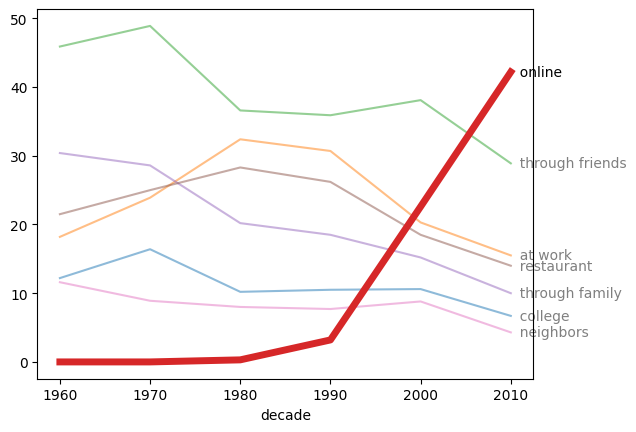

In [ ]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=5)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)


It's getting better! Next I'll improve the presentation of the axes.

The default chart is trapped in bounding lines called spines. The spines can be hidden, to produce a cleaner graph.

Let's hide all the spines except for the bottom spine.

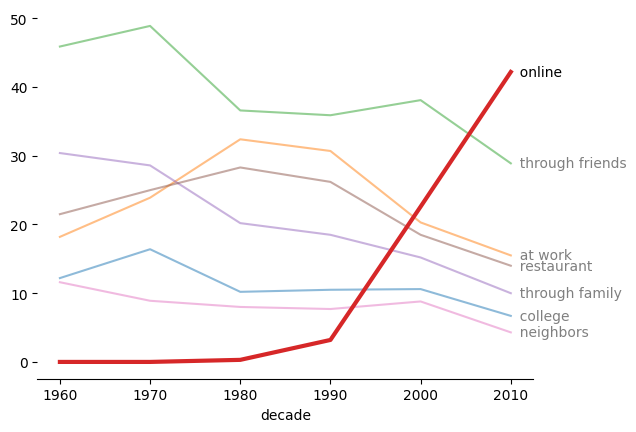

In [ ]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)

ax = plt.gca()
ax.spines[['left', 'top', 'right']].set_visible(False)


Next let's replace the floating tick marks on the y axis with horizontal grid lines. We can also fade the gridlines by reducing the alpha to 50%.

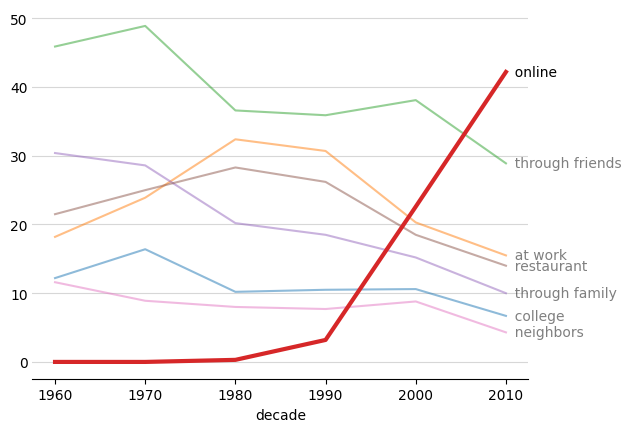

In [ ]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)

ax = plt.gca()
ax.spines[['left', 'top', 'right']].set_visible(False)
ax.tick_params(axis='y', length=0)
plt.grid(axis='y', alpha=0.5)

In [ ]:
def clean_axes( ):
    ax = plt.gca()
    ax.spines[['left', 'top', 'right']].set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.grid(axis='y', alpha=0.5)

Let's improve the graph by adding labels to the x and y axes. Without labels, it is not clear what is being represented or what the units are.

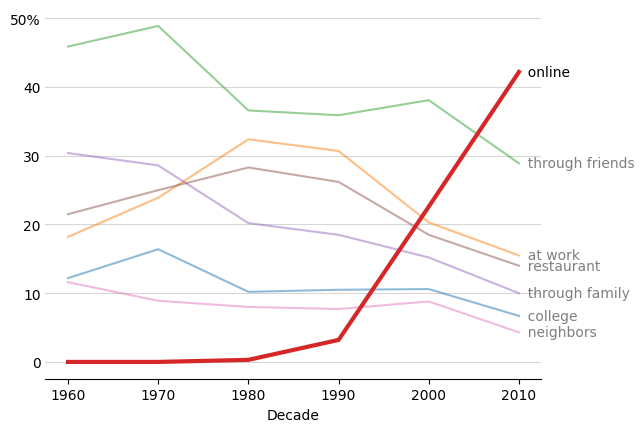

In [ ]:
df.plot(y=back_columns, color=back_colors, alpha=0.5)
plt.plot(df.index, df[focus_column], color=focus_color, linewidth=3)
plt.legend().set_visible(False)
add_end_labels(df, 2010, back_columns, alpha=0.5)
add_end_labels(df, 2010, [focus_column], alpha=1)
clean_axes()

y_ticks = [0, 10, 20, 30, 40, 50]
y_tick_labels = ['0', '10', '20', '30', '40', '50%']
plt.yticks(y_ticks, y_tick_labels)
plt.xlabel('Decade')
plt.show()

def add_axes_labels( ):
    y_ticks = [0, 10, 20, 30, 40, 50]
    y_tick_labels = ['0', '10', '20', '30', '40', '50%']
    plt.yticks(y_ticks, y_tick_labels)
    plt.xlabel('Decade')